In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
T = 100
t = np.arange(T)

In [3]:
x = np.cos(2*t*np.pi/T) + 2*np.cos(4*t*np.pi/T)

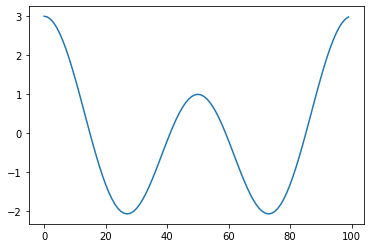

In [4]:
plt.plot(t, x)

### Calculating kth Fourier coefficient

We have:

$$
x[t] = \sum_{k=-(T-1)}^{T-1} F_{k} \exp(2𝑖𝜋𝑘t/𝑇)
$$

The idea behind calculating Fourier coefficients is to use the fact that:

$$
\forall k \neq 0, \sum_{t=0}^{T-1} \exp(2𝑖𝜋𝑘t/𝑇) = 0
$$

Therefore:

\begin{align}
\sum_{t=0}^{T-1} x[t] \exp(-2𝑖𝜋𝑘t/𝑇) &= \sum_{t=0}^{T-1} \sum_{k'=-(T-1)}^{T-1} F_{k'} \exp(2𝑖𝜋𝑘't/𝑇) \exp(-2𝑖𝜋𝑘t/𝑇) \\
&= \sum_{k'=-(T-1)}^{T-1} \sum_{t=0}^{T-1} F_{k'} \exp(2𝑖𝜋𝑘't/𝑇) \exp(-2𝑖𝜋𝑘t/𝑇) \\
&= \sum_{k'=-(T-1)}^{T-1} F_{k'} \Big( \sum_{t=0}^{T-1}  \exp(2𝑖𝜋(𝑘'-k)t/𝑇) \Big) \\
&= TF_{k}
\end{align}

It is easy to show that $\text{Re}[F_{k}] = \text{Re}[F_{-k}]$, because $\text{Re}[\exp{(2i \pi kt/T)}]=\text{Re}[\exp{(-2i \pi kt/T)}]$

Similarly, $\text{Im}[F_{k}] = -\text{Im}[F_{-k}]$, because $\text{Im}[\exp{(2i \pi kt/T)}]=-\text{Im}[\exp{(-2i \pi kt/T)}]$

Using this, we can rewrite the signal by using only the positive Fourier coefficients:

\begin{align}
x[t] &= F_{0} + \sum_{k=1}^{T-1} 2F_{k} \text{Re}[\exp(2𝑖𝜋𝑘t/𝑇)] \\
&= F_{0} + \sum_{k=1}^{T-1} 2\text{Re}[F_{k}] \cos{(2𝜋𝑘t/𝑇)}]
\end{align}

In [5]:
Fks = []
for k in range(5):
    Fk = np.real(np.mean(x * np.exp(-2*1j*np.pi*t*k/T)))
    Fks.append(Fk)
print(Fks)

[-2.708944180085382e-16, 0.4999999999999999, 1.0, 3.9968028886505634e-17, -1.3988810110276973e-16]


Reconstructing the signal

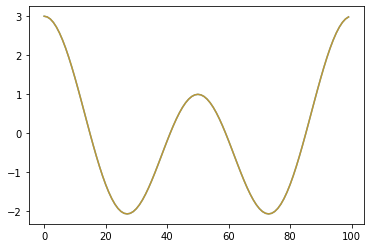

In [8]:
plt.plot(x)
x_hat = 0
for k in np.arange(0,5):
    x_hat += 2 * Fks[k] * np.cos(2*np.pi*t*k/T)
    
plt.plot(x_hat, alpha=0.7, c='orange')